In [ ]:
!pip install pyvis
from pyvis.network import Network
import pandas as pd

  Created wheel for pyvis: filename=pyvis-0.2.0-py3-none-any.whl size=23677 sha256=331f21b3873bace5dea90d8ec31df2de6c5bb8435460f7e5283da291d8364071
  Stored in directory: /root/.cache/pip/wheels/74/ed/a1/9441bf0a9e35efc8351ea92cb62c71c2a604a027b890f970c4
Successfully built pyvis


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Network = Network(height='3000px', width='400%', bgcolor='#222222', font_color='white')


Network.barnes_hut()
got_data = pd.read_csv('/content/drive/MyDrive/csv/network.csv')

sources = got_data['source']
targets = got_data['target']
weights = got_data['relation']

edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]

    Network.add_node(src, src, title=src)
    Network.add_node(dst, dst, title=dst)
    Network.add_edge(src, dst, value=w)

neighbor_map = Network.get_adj_list()


for node in Network.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])


TypeError: ignored

In [ ]:
print(neighbor_map)

{'Laurene': {'Arabel', 'Riannon'}, 'Riannon': {'Laurene', 'Flo'}, 'Gerianna': {'Vivia', 'Britte'}, 'Britte': {'Gerianna', 'Sandie'}, 'Danny': {'Vevay'}, 'Vevay': {'Danny', 'Emmey', 'Petronia', 'Neila', 'Max'}, 'Farrah': {'Flory'}, 'Flory': {'Wanda', 'Dagmar', 'Jinny', 'Farrah', 'Adore', 'Nelle'}, 'Zsa Zsa': {'Fidelia', 'Bee', 'Tina', 'Rochette'}, 'Fidelia': {'Sheelagh', 'Fernande', 'Zsa Zsa'}, 'Nonnah': {'Thalia', 'Gloria', 'Helena', 'Pollyanna'}, 'Thalia': {'Nonnah', 'Alex', 'Nita', 'Elvira'}, 'Dyann': {'Valera'}, 'Valera': {'Sara-Ann', 'Brandise', 'Dyann', 'Janey', 'Elbertina'}, 'Cathyleen': {'Rosabelle', 'Ingrid'}, 'Rosabelle': {'Leona', 'Bobbi', 'Nelle', 'Cathyleen'}, 'Kary': {'Mariele', 'Kerrin'}, 'Kerrin': {'Dacia', 'Kary', 'Caressa', 'Carmencita'}, 'Katleen': {'Marcy'}, 'Marcy': {'Taffy', 'Neila', 'Monika', 'Katleen'}, 'Marleah': {'Kimberley', 'Jaclyn', 'Debee', 'Ricky'}, 'Ricky': {'Sean', 'Philis', 'Marleah', 'June', 'Ermengarde'}, 'Sallie': {'Marnia', 'Anestassia'}, 'Anestassi

In [ ]:
from IPython.core.display import display, HTML

Network.show('characternet.html')
display(HTML('characternet.html'))

In [ ]:
import pandas as pd
import numpy as np

from plotnine import *
from plotnine.data import *

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/csv/network.csv')

In [ ]:
df.head(10)

,source,target,relation
0,Laurene,Riannon,9
1,Gerianna,Britte,26
2,Danny,Vevay,50
3,Farrah,Flory,11
4,Zsa Zsa,Fidelia,12
5,Nonnah,Thalia,18
6,Dyann,Valera,10
7,Cathyleen,Rosabelle,45
8,Kary,Kerrin,15
9,Katleen,Marcy,20


In [ ]:
source_list = list(df['source'])

In [ ]:
print(source_list)

['Laurene', 'Gerianna', 'Danny', 'Farrah', 'Zsa Zsa', 'Nonnah', 'Dyann', 'Cathyleen', 'Kary', 'Katleen', 'Marleah', 'Sallie', 'Genovera', 'Elyssa', 'Catrina', 'Donetta', 'Kamilah', 'Mellicent', 'Laurene', 'Harmonia', 'Grier', 'Keelia', 'Maud', 'Janey', 'Fanny', 'Belva', 'Dacia', 'Beverley', 'Hannis', 'Carol-Jean', 'Gerianna', 'Donetta', 'Imojean', 'Lynnea', 'Pamella', 'Charmaine', 'Raquela', 'Marjie', 'Mallory', 'Carmela', 'Celisse', 'Rozele', 'Tiffie', 'Doro', 'Wilma', 'Rosanne', 'Marika', 'Rosanne', 'Henriette', 'Dede', 'Bettine', 'Valera', 'Mady', 'Nananne', 'Isa', 'Britni', 'Orsola', 'Gusella', 'Carolina', 'Ariela', 'Nerta', 'Stevana', 'Rivalee', 'Nananne', 'Tina', 'Marnia', 'Carly', 'Wendi', 'Gale', 'Noelle', 'Stacey', 'Adore', 'Moyna', 'Ardeen', 'Lanna', 'Brianna', 'Abbie', 'Vonny', 'Gwyneth', 'Stacey', 'Janis', 'Leia', 'Glenda', 'Dorothy', 'Albertina', 'Susette', 'Jan', 'Dawn', 'Amara', 'Marcy', 'Nananne', 'Gilda', 'Yvonne', 'Myrtice', 'Rosabelle', 'Leontine', 'Shel', 'Ardys', '

In [ ]:
from collections import Counter

In [ ]:
Counter(source_list)

Counter({'Aaren': 2,
         'Abbie': 2,
         'Ada': 3,
         'Addia': 2,
         'Adore': 1,
         'Agathe': 1,
         'Agnese': 1,
         'Aili': 3,
         'Aimil': 2,
         'Alameda': 1,
         'Albertina': 1,
         'Alejandra': 1,
         'Alex': 1,
         'Alexine': 2,
         'Alia': 2,
         'Alie': 1,
         'Alisha': 1,
         'Alleen': 3,
         'Allis': 2,
         'Althea': 1,
         'Alyda': 1,
         'Alyssa': 1,
         'Amara': 1,
         'Amii': 1,
         'Ana': 4,
         'Anallese': 3,
         'Andeee': 1,
         'Andree': 3,
         'Anestassia': 1,
         'Angelique': 2,
         'Ann-Marie': 1,
         'Annaliese': 1,
         'Annecorinne': 2,
         'Annora': 2,
         'Anthia': 2,
         'Antonietta': 2,
         'Arabel': 3,
         'Ardeen': 2,
         'Ardenia': 2,
         'Ardys': 1,
         'Ariela': 3,
         'Arlena': 4,
         'Aryn': 1,
         'Ashlee': 2,
         'Atlanta': 1,
   

In [ ]:
source_list = Counter(source_list)

In [ ]:
print(source_list)

['Laurene', 'Gerianna', 'Danny', 'Farrah', 'Zsa Zsa', 'Nonnah', 'Dyann', 'Cathyleen', 'Kary', 'Katleen', 'Marleah', 'Sallie', 'Genovera', 'Elyssa', 'Catrina', 'Donetta', 'Kamilah', 'Mellicent', 'Laurene', 'Harmonia', 'Grier', 'Keelia', 'Maud', 'Janey', 'Fanny', 'Belva', 'Dacia', 'Beverley', 'Hannis', 'Carol-Jean', 'Gerianna', 'Donetta', 'Imojean', 'Lynnea', 'Pamella', 'Charmaine', 'Raquela', 'Marjie', 'Mallory', 'Carmela', 'Celisse', 'Rozele', 'Tiffie', 'Doro', 'Wilma', 'Rosanne', 'Marika', 'Rosanne', 'Henriette', 'Dede', 'Bettine', 'Valera', 'Mady', 'Nananne', 'Isa', 'Britni', 'Orsola', 'Gusella', 'Carolina', 'Ariela', 'Nerta', 'Stevana', 'Rivalee', 'Nananne', 'Tina', 'Marnia', 'Carly', 'Wendi', 'Gale', 'Noelle', 'Stacey', 'Adore', 'Moyna', 'Ardeen', 'Lanna', 'Brianna', 'Abbie', 'Vonny', 'Gwyneth', 'Stacey', 'Janis', 'Leia', 'Glenda', 'Dorothy', 'Albertina', 'Susette', 'Jan', 'Dawn', 'Amara', 'Marcy', 'Nananne', 'Gilda', 'Yvonne', 'Myrtice', 'Rosabelle', 'Leontine', 'Shel', 'Ardys', '

In [ ]:
Count_dict = Counter(source_list)

In [ ]:
value_list = []
count = 0
for count in range(len(source_list)):

  for key, value in Count_dict.items():
    if key == source_list[count]:
      value_list.append(value)
      break
  count = count + 1

print(value_list)




[2, 2, 1, 1, 1, 3, 1, 1, 2, 1, 3, 2, 3, 1, 1, 3, 1, 3, 2, 2, 3, 5, 1, 2, 6, 1, 2, 2, 1, 2, 2, 3, 3, 1, 1, 1, 3, 3, 1, 4, 1, 3, 3, 2, 2, 2, 1, 2, 3, 1, 1, 3, 2, 3, 1, 1, 4, 2, 3, 3, 1, 5, 3, 3, 2, 4, 2, 1, 6, 4, 2, 1, 2, 2, 2, 3, 2, 2, 1, 2, 3, 2, 2, 2, 1, 4, 3, 2, 1, 2, 3, 2, 2, 2, 3, 4, 2, 1, 2, 2, 2, 1, 3, 2, 1, 2, 2, 6, 2, 2, 2, 2, 2, 1, 3, 2, 1, 4, 5, 3, 3, 1, 5, 6, 3, 5, 4, 2, 1, 1, 3, 2, 4, 3, 3, 2, 2, 1, 1, 2, 5, 1, 5, 3, 1, 2, 5, 3, 4, 1, 3, 1, 1, 2, 2, 4, 2, 2, 2, 3, 3, 2, 3, 3, 1, 2, 1, 3, 1, 3, 4, 4, 3, 1, 1, 1, 3, 2, 4, 2, 2, 4, 1, 2, 2, 2, 2, 3, 4, 3, 1, 2, 2, 6, 1, 4, 1, 2, 2, 2, 2, 3, 1, 3, 2, 1, 5, 5, 2, 4, 1, 1, 1, 1, 3, 1, 5, 2, 1, 2, 3, 2, 2, 3, 2, 1, 2, 3, 1, 2, 2, 5, 3, 1, 1, 2, 4, 2, 2, 2, 1, 2, 2, 2, 6, 1, 1, 3, 3, 3, 4, 3, 2, 3, 3, 3, 2, 3, 1, 2, 2, 2, 4, 2, 2, 2, 1, 2, 3, 3, 3, 3, 2, 3, 1, 3, 1, 4, 3, 2, 1, 2, 1, 2, 3, 6, 1, 2, 2, 4, 4, 5, 4, 4, 1, 6, 2, 2, 2, 2, 3, 1, 2, 1, 3, 2, 1, 1, 4, 2, 2, 1, 3, 2, 6, 4, 4, 1, 2, 3, 3, 1, 3, 3, 5, 1, 3, 2, 1, 2, 1, 2, 1, 

In [ ]:
df['number of relations'] = value_list

In [ ]:
df

,source,target,relation,number of relations
0,Laurene,Riannon,9,2
1,Gerianna,Britte,26,2
2,Danny,Vevay,50,1
3,Farrah,Flory,11,1
4,Zsa Zsa,Fidelia,12,1
...,...,...,...,...
995,Benita,Inga,14,2
996,Marline,Courtnay,49,1
997,Kimmy,Lynnea,34,1
998,Kathi,Mathilda,8,3


In [ ]:
df = df.rename(columns={'relation': 'strength of relation'})

In [ ]:
df

,source,target,strength of relation,number of relations
0,Laurene,Riannon,9,2
1,Gerianna,Britte,26,2
2,Danny,Vevay,50,1
3,Farrah,Flory,11,1
4,Zsa Zsa,Fidelia,12,1
...,...,...,...,...
995,Benita,Inga,14,2
996,Marline,Courtnay,49,1
997,Kimmy,Lynnea,34,1
998,Kathi,Mathilda,8,3


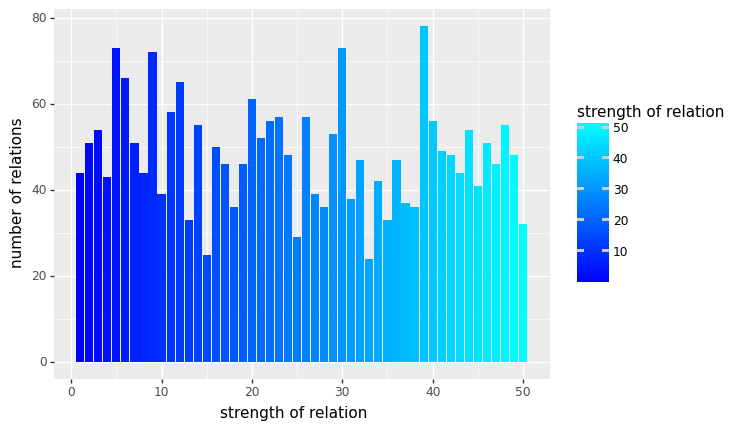

<ggplot: (8751540410085)>

In [ ]:
ggplot(data=df) +\
geom_bar(mapping=aes(x="strength of relation", y="number of relations", fill = "strength of relation"), stat="identity") +\
scale_fill_gradient(low='blue', high='cyan')